#### Overview

1.  How does MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
2. Is there a difference in revenue between 2018 and 2020?
3. What  is the difference in revenue for movie length of short vs. long

# Create project

In [2]:
# basic imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# SQL
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

# Stats
import scipy.stats as stats
import statsmodels.api as sm

# settings
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

# Load Data and Process

#### Several step need to be taken to clean and prepare the data

-  for the first hypothesis drop movies with low counts in certification categories
- for the second hypothesis  the movies need to be grouped

## First Hypothesis prep

In [3]:
# load data of years 2010-2020
year_2010 = pd.read_csv('API_Data/final_tmdb_data_2010.csv.gz', low_memory = False)
year_2011 = pd.read_csv('API_Data/final_tmdb_data_2011.csv.gz', low_memory = False, lineterminator='\n')
year_2012 = pd.read_csv('API_Data/final_tmdb_data_2012.csv.gz', low_memory = False, lineterminator='\n')
year_2013 = pd.read_csv('API_Data/final_tmdb_data_2013.csv.gz', low_memory = False)
year_2014 = pd.read_csv('API_Data/final_tmdb_data_2014.csv.gz', low_memory = False, lineterminator='\n')
year_2015 = pd.read_csv('API_Data/final_tmdb_data_2015.csv.gz', low_memory = False, lineterminator='\n')
year_2016 = pd.read_csv('API_Data/final_tmdb_data_2016.csv.gz', low_memory = False)
year_2017 = pd.read_csv('API_Data/final_tmdb_data_2017.csv.gz', low_memory = False, lineterminator='\n')
year_2018 = pd.read_csv('API_Data/final_tmdb_data_2018.csv.gz', low_memory = False, lineterminator='\n')
year_2019 = pd.read_csv('API_Data/final_tmdb_data_2019.csv.gz', low_memory = False, lineterminator='\n')
year_2020 = pd.read_csv('API_Data/final_tmdb_data_2020.csv.gz', low_memory = False, lineterminator='\n')


In [4]:
#create new dataframe
tmdb_df = pd.concat([ year_2010,year_2011, year_2012, year_2013,year_2014, 
                     year_2015, year_2016, year_2017, 
                     year_2018, year_2019, year_2020])
tmdb_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.00,NaN,NaN,0.00,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,"23,738.00",en,Quantum Quest: A Cassini Space Odyssey,...,0.00,45.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.00,8.40,7.00,NaN
2,tt0326965,0.00,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,"40,048.00",en,In My Sleep,...,0.00,90.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.00,5.50,31.00,PG-13
3,tt0331312,0.00,NaN,NaN,0.00,[],NaN,"214,026.00",en,This Wretched Life,...,0.00,0.00,[],Released,NaN,This Wretched Life,0.00,5.00,1.00,NaN
4,tt0393049,0.00,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,"300,000.00","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,"324,352.00",en,Anderson's Cross,...,0.00,98.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.00,4.00,5.00,NaN


In [5]:
# look at info
tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40570 entries, 0 to 3717
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                40570 non-null  object 
 1   adult                  40559 non-null  float64
 2   backdrop_path          26186 non-null  object 
 3   belongs_to_collection  2384 non-null   object 
 4   budget                 40559 non-null  float64
 5   genres                 40559 non-null  object 
 6   homepage               11056 non-null  object 
 7   id                     40559 non-null  float64
 8   original_language      40559 non-null  object 
 9   original_title         40559 non-null  object 
 10  overview               39638 non-null  object 
 11  popularity             40559 non-null  float64
 12  poster_path            37225 non-null  object 
 13  production_companies   40559 non-null  object 
 14  production_countries   40559 non-null  object 
 15  rel

In [8]:
# look at  counts
tmdb_df['certification'].value_counts()


R          3307
NR         2404
PG-13      1859
PG          860
G           287
NC-17       111
Unrated       4
R             1
PG-13         1
10            1
Name: certification, dtype: int64

In [9]:
# fix low values
tmdb_df['certification'] = tmdb_df['certification'].replace({'R ': 'R',
                                                            'PG-13 ': 'PG-13'})
tmdb_df['certification'].value_counts()

R          3308
NR         2404
PG-13      1860
PG          860
G           287
NC-17       111
Unrated       4
10            1
Name: certification, dtype: int64

In [39]:
# import the data
filename = 'Data/tmdb_results_combined_df.csv.gz'
firsthypo_df=pd.read_csv(filename)
#check that the data loaded
firsthypo_df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.00,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,"62,127.00",en,The Fantasticks,...,0.00,86.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.00,5.50,22.00,NaN


In [12]:
#derop null values
tmdb_df = tmdb_df[tmdb_df.revenue !=0]



In [7]:
# explore the  missing data
num_missing = tmdb_df['certification'].isna().sum()

total_rows = tmdb_df.shape[0]

percent_missing = num_missing / total_rows
print(f'{percent_missing:.2f}% of the data in the certification column is missing')

0.00% of the data in the certification column is missing


In [49]:
# drop the unrated column
firsthypo_df = firsthypo_df.loc[firsthypo_df['certification'] != 'Unrated']

In [35]:
# drop the NC-17 column
firsthypo_df = firsthypo_df.loc[firsthypo_df['certification'] != 'NC-17']

In [50]:
# resolve small data counts by creating  new column  and check value
firsthypo_df['certification'].value_counts()

R        467
PG-13    182
NR        71
PG        63
G         25
NC-17      6
Name: certification, dtype: int64

In [31]:
#drop null values in certification column
firsthypo_df = firsthypo_df.dropna(subset=['certification'])

In [32]:
firsthypo_df['genres'].describe()


count                               814
unique                              332
top       [{'id': 18, 'name': 'Drama'}]
freq                                 70
Name: genres, dtype: object

In [7]:
# resolve small data counts by creating  new column  and check value
firsthypo_df['certification'].value_counts()

R        205
PG-13    125
PG        34
G         13
NR        12
Name: certification, dtype: int64

## Second Hypothesis prep

In [46]:
#read the data
df_2018 = pd.read_json('API_Data/tmdb_api_results_2018.json')
df_2018.head()


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0069049,0.00,/zjG95oDnBcFKMPgBEmmuNVOMC90.jpg,None,"12,000,000.00","[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,"299,782.00",en,The Other Side of the Wind,...,0.00,122.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making,The Other Side of the Wind,0.00,6.70,155.00,R
2,tt0192528,0.00,/kOxAfSyHZEDEhOCic8TxXprUg4T.jpg,None,"5,000,000.00","[{'id': 18, 'name': 'Drama'}]",None,"567,662.00",en,Reverse Heaven,...,0.00,104.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.00,7.20,5.00,
3,tt0360556,0.00,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,None,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,"401,905.00",en,Fahrenheit 451,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.00,5.40,686.00,PG-13
4,tt0365545,0.00,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,None,0.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,"519,035.00",en,Nappily Ever After,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.00,7.20,752.00,


In [51]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4520 non-null   object 
 1   adult                  4519 non-null   float64
 2   backdrop_path          3450 non-null   object 
 3   belongs_to_collection  227 non-null    object 
 4   budget                 4519 non-null   float64
 5   genres                 4519 non-null   object 
 6   homepage               4074 non-null   object 
 7   id                     4519 non-null   float64
 8   original_language      4519 non-null   object 
 9   original_title         4519 non-null   object 
 10  overview               4519 non-null   object 
 11  popularity             4519 non-null   float64
 12  poster_path            4411 non-null   object 
 13  production_companies   4519 non-null   object 
 14  production_countries   4519 non-null   object 
 15  rele

In [47]:
#loading 2021 data, errors in reading 2020 data
df_2021 = pd.read_csv('API_Data/final_tmdb_data_2001.csv.gz', low_memory=False)
df_2021.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.00,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,"48,000,000.00","[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,"11,232.00",en,Kate & Leopold,...,"76,019,048.00",118.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.00,6.33,"1,195.00",PG-13


In [52]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1337 non-null   object 
 1   adult                  1336 non-null   float64
 2   backdrop_path          720 non-null    object 
 3   belongs_to_collection  92 non-null     object 
 4   budget                 1336 non-null   float64
 5   genres                 1336 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1336 non-null   float64
 8   original_language      1336 non-null   object 
 9   original_title         1336 non-null   object 
 10  overview               1308 non-null   object 
 11  popularity             1336 non-null   float64
 12  poster_path            1201 non-null   object 
 13  production_companies   1336 non-null   object 
 14  production_countries   1336 non-null   object 
 15  rele

In [53]:
# create one dataframe
combinedyears = pd.concat([df_2018, df_2021])

In [54]:
#seperate out years
combinedyears['release_date'] = pd.to_datetime(combinedyears['release_date'])

In [55]:
#create year column
combinedyears['year'] = combinedyears['release_date'].dt.year
combinedyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 1336
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_id                5857 non-null   object        
 1   adult                  5855 non-null   float64       
 2   backdrop_path          4170 non-null   object        
 3   belongs_to_collection  319 non-null    object        
 4   budget                 5855 non-null   float64       
 5   genres                 5855 non-null   object        
 6   homepage               4182 non-null   object        
 7   id                     5855 non-null   float64       
 8   original_language      5855 non-null   object        
 9   original_title         5855 non-null   object        
 10  overview               5827 non-null   object        
 11  popularity             5855 non-null   float64       
 12  poster_path            5612 non-null   object        
 13  pro

In [56]:
# drop null values
combinedyears = combinedyears.dropna(subset=['year','revenue'])

In [57]:
#create 2001 column
combinedyears['year_2021'] = combinedyears['year'] == 2021

In [58]:
#check values
combinedyears['year_2021'].value_counts()

False    5736
True       23
Name: year_2021, dtype: int64

In [59]:
## save list of columns needed for each group
needed_cols = ['year_2021', 'revenue']

In [60]:
## save year_2021 in separate variable
year_2021_df = combinedyears.loc[combinedyears['year_2021']==True, needed_cols]
year_2021_df

,year_2021,revenue
123,True,0.00
126,True,0.00
127,True,0.00
248,True,0.00
600,True,0.00
764,True,0.00
980,True,0.00
1022,True,0.00
1260,True,0.00
1306,True,0.00


In [61]:
## save year_2018 in separate variable
year_2018_df = combinedyears.loc[combinedyears['year_2021']==False, needed_cols]
year_2018_df

,year_2021,revenue
1,False,0.00
2,False,0.00
3,False,0.00
4,False,0.00
5,False,0.00
...,...,...
1332,False,0.00
1333,False,0.00
1334,False,0.00
1335,False,0.00


In [62]:
## save list of columns needed for each group
needed_cols = ['year_2021', 'revenue']

## Third Hypothesis prep

In [20]:
#explore runtime
firsthypo_df['runtime'].describe()

count   546.00
mean    104.60
std      22.40
min       0.00
25%      91.00
50%     100.00
75%     114.00
max     224.00
Name: runtime, dtype: float64

In [21]:
# look at runtime
firsthypo_df['runtime'].value_counts()

90.00     28
99.00     18
95.00     18
108.00    18
98.00     18
          ..
199.00     1
77.00      1
165.00     1
216.00     1
70.00      1
Name: runtime, Length: 87, dtype: int64

In [22]:
# create groups
long_film_df = firsthypo_df.loc[firsthypo_df['runtime'] > 150].copy()
short_film_df = firsthypo_df.loc[firsthypo_df['runtime'] < 90].copy()

In [23]:
display(long_film_df.info(), short_film_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 61 to 2527
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                22 non-null     object 
 1   adult                  22 non-null     float64
 2   backdrop_path          20 non-null     object 
 3   belongs_to_collection  3 non-null      object 
 4   budget                 22 non-null     float64
 5   genres                 22 non-null     object 
 6   homepage               3 non-null      object 
 7   id                     22 non-null     float64
 8   original_language      22 non-null     object 
 9   original_title         22 non-null     object 
 10  overview               22 non-null     object 
 11  popularity             22 non-null     float64
 12  poster_path            22 non-null     object 
 13  production_companies   22 non-null     object 
 14  production_countries   22 non-null     object 
 15  relea

None

None

In [24]:
longfilm_runtime = long_film_df['runtime']
shortfilm_runtime = short_film_df['runtime']

# First Hypothesis Testing
#### What are the differences in  revenue for movie ratings?


- $H_0$ (Null Hypothesis): Movies have the same revenue in all MPAA ratings
- $H_A$ (Alternative Hypothesis): Movies with different MPAA ratings have different revenue.

Possible question: How much is the differences using linear regression
  -  For this question rating will need to be grouped. 


## Test types: ANOVA (rejected) and Kruskall

In [13]:
# Create groups dictionary.
groups = {}
## Loop through all unique categories
for rating in tmdb_df['certification'].unique():
    ## Get series for group and rename
    data = tmdb_df.loc[tmdb_df['certification']==rating,'revenue'].copy()
    
    # save into the dictionary
    groups[rating] = data
groups.keys()

dict_keys(['PG', 'R', 'PG-13', 'G', 'NR', 'NC-17'])

### Check Assumptions for ANOVA
- normality
- equal variance
- outliers

### Normality

In [14]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,343.00,0.00,186.70
R,"1,273.00",0.00,"1,162.96"
PG-13,892.00,0.00,694.21
G,60.00,0.00,54.97
NR,175.00,0.00,248.23
NC-17,13.00,0.11,4.33


In [16]:

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for rating, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([rating,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,PG,332,0.00,True
1,R,1243,0.00,True
2,PG-13,868,0.00,True
3,G,58,0.00,True
4,NR,172,0.00,True
5,NC-17,13,0.11,False


#### The data  failed the assumpution for normality for G, PG, PG-13, R, and NR groups, but these groups are large enough that we can safely disregard the assumption of normality.

### Check for Outliers

In [15]:
## Loop through groups dict
for rating, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {rating} group.")

    ## Remove the outiers from data and overwrite the rating data in the dict
    data = data.loc[~outliers]
    groups[rating] = data

There were 11 outliers in the PG group.
There were 30 outliers in the R group.
There were 24 outliers in the PG-13 group.
There were 2 outliers in the G group.
There were 3 outliers in the NR group.
There were 0 outliers in the NC-17 group.


### Equal Variance

In [17]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=66.73338110641302, pvalue=7.093189576096272e-66)


In [18]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


- The null hypothesis is rejected the null hypothesis of equal variance.
- The ANOVA test is not appropriate, Kruskal-Wallis test is the correct test.

###  Run Kruskall Wallace test

In [19]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=456.6633529097644, pvalue=1.794220577005223e-96)


True

### Interpretation
- The p value is less 0.05. From this data the null hypothesis is rejected. There is a difference between revenue in the different MPAA ratings

### Visual  for First Hypothesis

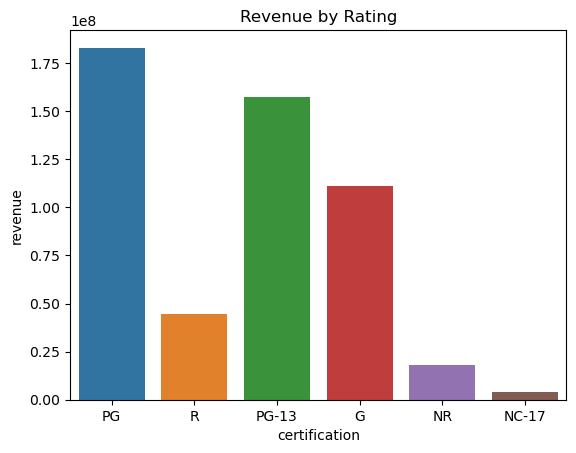

In [21]:
#visualize the data
ax= sns.barplot(data = tmdb_df, x='certification',y='revenue', errorbar=None);
ax.set_title("Revenue by Rating");

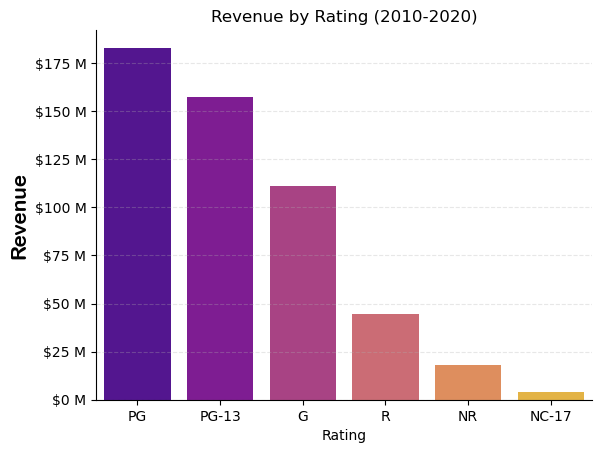

In [28]:
#order=df.groupby('Genre')['Rating'].agg('mean').sort_values(ascending=False)
order = tmdb_df.groupby(["certification"])["revenue"].mean().sort_values(ascending=False).index
ax= sns.barplot(data = tmdb_df, x='certification',y='revenue', order=order,
                palette='plasma',errorbar=None);
ax.set_title("Revenue by Rating (2010-2020)")

plt.xlabel('Rating')
plt.ylabel('Revenue', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# setting y axis to display in millions
from matplotlib.ticker import FuncFormatter
def hundred_k(x, pos):
    return f'${x*1e-6:,.0f} M'
price_fmt_100k = FuncFormatter(hundred_k)
ax.yaxis.set_major_formatter(price_fmt_100k)
ax.grid(axis='y', alpha=.3, ls='--') 

plt.savefig('Images/Bar Plot for Revenue by Rating', bbox_inches='tight')


## Second Hypothesis
- Is there a difference in revenue of 2018 and 2020 films?

#### Hypothesis
- $H_0$ (Null Hypothesis): Movies have the same revenue in 2018 and 2020. 
- $H_A$ (Alternative Hypothesis): Movies have  different revenue in 2018 and 2020. 
#### Test type: Independent T test or 2 sample
- numeric
- two groups
#### Assumptions
- outliers
- normality ( discuss sample size > 15)
- equal variance

### Outliers

In [63]:
## Check year_2021_group for outliers
year_2021_outliers = np.abs(stats.zscore(year_2021_group)) > 3

year_2021_outliers.sum()

0

In [64]:
## Check year_2018 group for outliers
year_2018_outliers = np.abs(stats.zscore(year_2018_group)) > 3

year_2018_outliers.sum()

59

In [65]:
## remove 2018 outliers  
year_2018_group = year_2018_group.loc[~year_2018_outliers]

### Test for Normality

In [66]:
#check groups size
len(year_2021_group)

23

In [67]:
#check groups size
len(year_2018_group)

5677